# Do Face-offs Really Win Games? 
## Statistical Analysis for the NHL 2022-23 Regular Season

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# get the url
url = "https://www.quanthockey.com/nhl/standings/standings.php?v=l&s=pts&so=d&ha=all&sd=none&ed=none"
response = requests.get(url)
soup = BeautifulSoup(response.content, "lxml")
table = soup.find("table", {"id": "statistics", "class": "ps_tbl nowrap dt2"})
rows = table.find_all("tr")
data = []
# Retrieve the data from each team
for row in rows:
    td_elements = row.find_all("td")
    data.append([element.get_text() for element in td_elements])


# Remove empty rows and header
# class="hl qh-nowrap"
teams_soup = soup.find_all(class_="hl qh-nowrap")
teams = [i.get_text() for i in teams_soup]

len(teams)
columns = [
    #overall record
    'gp',
    'w',
    'l',
    'otl',
    'pts',
    'ppg',
    'row',
    #PDO
    'pdo',
    'pdo-a',
    #goals
    'gf',
    'ga',
    'gd',
    'gfpg',
    'gapg',
    'gdpg',
    #Power-play
    'ppo',
    'ppg',
    'shg-a',
    'pp%',
    'adj-pp%',
    #Penalty kill
    'pko',
    'ppg-a',
    'shg',
    'pk%',
    'adj-pk%',
    #Shots
    'sf',
    'sa',
    'sd',
    'sdpg',
    'sh%',
    'sh%ag',
    #Face - Offs
    'fow',
    'fol',
    'fod',
    'fodpg',
    'fo%',
    #Save %
    'sv%',
    'sv%a',
    #Hits
    'hits',
    'hits-a',
    'hits-d',
    'hits-dpg',
    #Blocked Shots
    'bs',
    'bsa',
    'bsd',
    'bsdpg'
] 
data = data[2:]
df = pd.DataFrame(data=data, columns=columns, index = teams)
df.index.name = 'team'
df.head()

,gp,w,l,otl,pts,ppg,row,pdo,pdo-a,gf,...,sv%,sv%a,hits,hits-a,hits-d,hits-dpg,bs,bsa,bsd,bsdpg
team,,,,,,,,,,,,,,,,,,,,,
Boston Bruins,82,65,12,5,135,1.65,61,104.2%,96.6%,305,...,93.12%,89.46%,1925,2097,-172,-2.097,1146,1180,-34,-0.414
Carolina Hurricanes,82,52,21,9,113,1.38,48,99.9%,101.0%,266,...,90.71%,91.20%,1351,1846,-495,-6.036,834,1381,-547,-6.670
New Jersey Devils,82,52,22,8,112,1.37,50,101.1%,100.0%,291,...,90.84%,90.37%,1363,1829,-466,-5.683,1219,1376,-157,-1.914
Toronto Maple Leafs,82,50,21,11,111,1.35,49,101.9%,99.0%,279,...,91.29%,89.90%,1775,2537,-762,-9.293,1214,1128,+86,+1.049
Vegas Golden Knights,82,51,22,9,111,1.35,46,101.9%,99.0%,272,...,91.55%,90.17%,1930,2334,-404,-4.926,1494,1262,+232,+2.830


In [2]:
#Clean the data
import re
from tqdm import tqdm
tqdm.pandas()
def clean_percentages(item):
    number = re.findall(r'\d+\.\d+',item)[0]
    return float(number)/100

percent_columns = ['pdo', 'pdo-a', 'pp%', 'adj-pp%','pk%','adj-pk%','sh%','sh%ag','fo%','sv%','sv%a',]
for col in percent_columns:
    df[col] = df[col].apply(clean_percentages)
    
df_num = df.apply(pd.to_numeric)
df_num.reset_index(inplace=True)
df_num

,team,gp,w,l,otl,pts,ppg,row,pdo,pdo-a,...,sv%,sv%a,hits,hits-a,hits-d,hits-dpg,bs,bsa,bsd,bsdpg
0,Boston Bruins,82,65,12,5,135,1.65,61,1.042,0.966,...,0.9312,0.8946,1925,2097,-172,-2.097,1146,1180,-34,-0.414
1,Carolina Hurricanes,82,52,21,9,113,1.38,48,0.999,1.010,...,0.9071,0.9120,1351,1846,-495,-6.036,834,1381,-547,-6.670
2,New Jersey Devils,82,52,22,8,112,1.37,50,1.011,1.000,...,0.9084,0.9037,1363,1829,-466,-5.683,1219,1376,-157,-1.914
3,Toronto Maple Leafs,82,50,21,11,111,1.35,49,1.019,0.990,...,0.9129,0.8990,1775,2537,-762,-9.293,1214,1128,86,1.049
4,Vegas Golden Knights,82,51,22,9,111,1.35,46,1.019,0.990,...,0.9155,0.9017,1930,2334,-404,-4.926,1494,1262,232,2.830
5,Edmonton Oilers,82,50,23,9,109,1.33,50,1.022,0.987,...,0.9037,0.8874,1873,2019,-146,-1.781,1037,1192,-155,-1.891
6,Colorado Avalanche,82,51,24,7,109,1.33,45,1.017,0.992,...,0.9169,0.9039,1613,1879,-266,-3.244,1114,1330,-216,-2.635
7,Dallas Stars,82,47,21,14,108,1.32,43,1.024,0.987,...,0.9165,0.8992,1648,1937,-289,-3.524,1151,1351,-200,-2.439
8,New York Rangers,82,47,22,13,107,1.30,43,1.018,0.990,...,0.9125,0.8999,1978,1740,238,2.902,1205,1180,25,0.305
9,Los Angeles Kings,82,47,25,10,104,1.27,41,0.995,1.014,...,0.8918,0.9034,1741,2266,-525,-6.402,1308,1201,107,1.305


/var/folders/h2/z0tcwyw92ys3h8zpgpm8f57c0000gn/T/ipykernel_62653/3700108271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['wr'] = stats['w']/82 #win rate
/var/folders/h2/z0tcwyw92ys3h8zpgpm8f57c0000gn/T/ipykernel_62653/3700108271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['pe'] = stats.gf**2 / (stats.gf**2 + stats.ga**2)


[Text(0.5, 1.0, 'Win Rate and Pythagorean Expectation')]

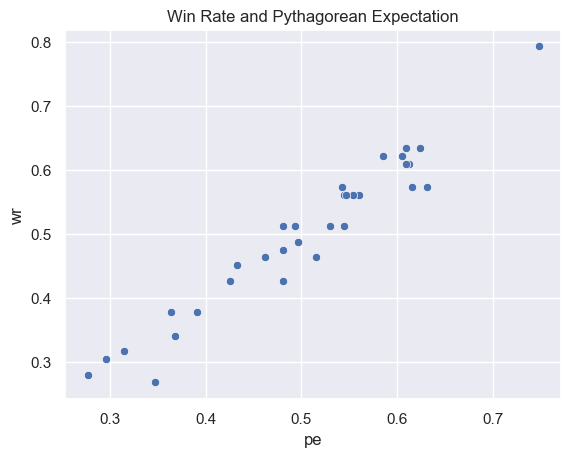

In [3]:
# With numeric data we can now do the statistical analysis. First we need subset with all the columns
stats = df_num[['team', 'w', 'gf','ga','pts', 'fo%', 'sd']]
stats['wr'] = stats['w']/82 #win rate
stats['pe'] = stats.gf**2 / (stats.gf**2 + stats.ga**2)
# now we can make the desired scatter plots
%matplotlib inline
import seaborn as sns
sns.set()
sns.scatterplot(data = stats,x= 'pe', y= 'wr').set(title = 'Win Rate and Pythagorean Expectation')

[Text(0.5, 1.0, 'Win Rate and Face-Off Percentage')]

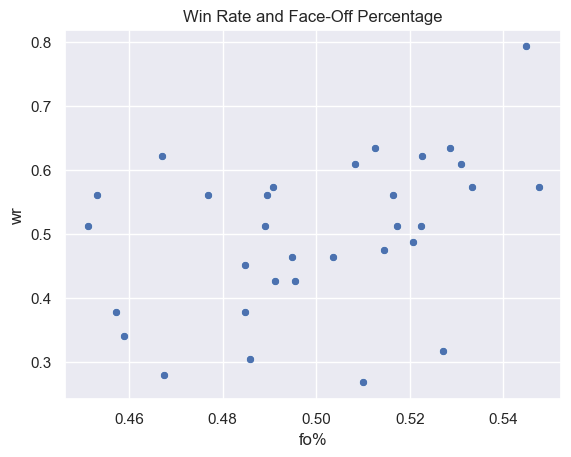

In [4]:
sns.scatterplot(data = stats,x= 'fo%', y= 'wr').set(title = 'Win Rate and Face-Off Percentage')

[Text(0.5, 1.0, 'Total Points and Face-Off Percentage')]

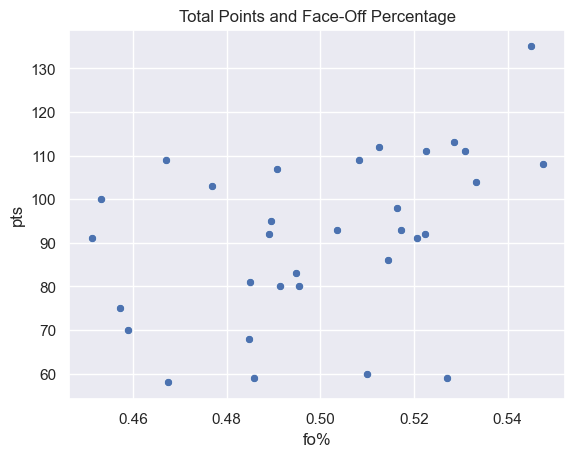

In [5]:
sns.scatterplot(data = stats,x= 'fo%', y= 'pts').set(title = 'Total Points and Face-Off Percentage')

In [6]:
# correlation analysis
from scipy.stats import pearsonr
res = pearsonr(stats.wr, stats.pe)
print(f'For win rate and pythagorean expectation:\n{res}\n------------------')
res = pearsonr(stats.wr, stats.pts)
print(f'For win rate and points:\n{res}\n------------------')
res = pearsonr(stats.wr, stats['fo%'])
print(f'For win rate and Face-Off Percentage:\n{res}\n------------------') 
res = pearsonr(stats.w, stats['fo%'])
print(f'For total wins and Face-Off Percentage:\n{res}\n------------------') 

For win rate and pythagorean expectation:
PearsonRResult(statistic=0.9708407054391576, pvalue=3.657776710754094e-20)
------------------
For win rate and points:
PearsonRResult(statistic=0.9878121200636785, pvalue=8.497727351432738e-26)
------------------
For win rate and Face-Off Percentage:
PearsonRResult(statistic=0.4002748088691709, pvalue=0.023204137139899942)
------------------
For total wins and Face-Off Percentage:
PearsonRResult(statistic=0.40027480886917105, pvalue=0.02320413713989985)
------------------


How about _outshotting_ the opposition?

[Text(0.5, 1.0, 'Shot Differential vs Win Rate')]

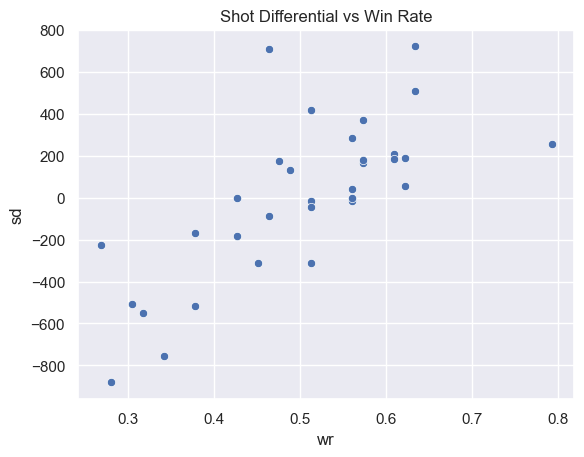

In [7]:
sns.scatterplot(data = stats,x= 'wr', y= 'sd').set(title = 'Shot Differential vs Win Rate')

In [8]:
res = pearsonr(stats.wr, stats.sd)
print(f'For total wins and Face-Off Percentage:\n{res}\n------------------') 

For total wins and Face-Off Percentage:
PearsonRResult(statistic=0.7277884834509107, pvalue=2.3569883832418685e-06)
------------------
